In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sleepdf = pd.read_csv('sleepdata.csv')
sleepdf.head()
sleepdf.describe()

,StartDate,EndDate,Which of the following best describes your current relationship status?,"How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.","When both you and your partner are at home, how often do you sleep in separate beds?","When you're not sleeping in the same bed as your partner, where do you typically sleep?",Unnamed: 6,"When you're not sleeping in the same bed, where does your partner typically sleep?",Unnamed: 8,What are the reasons that you sleep in separate beds? Please select all that apply.,...,"To what extent do you agree with the following statement: ""sleeping in separate beds helps us to stay together.""","To what extent do you agree with the following statement: ""we sleep better when we sleep in separate beds.""","To what extent do you agree with the following statement:Î_""our sex life has improved as a result of sleeping in separate beds.""Î_",Which of the following best describes your current occupation?,Unnamed: 25,Gender,Age,Household Income,Education,Location (Census Region)
count,1093,1093,1094,1080,1080,483,28,483,22,221,...,482,482,482,1065,289,1006,1006,811,1002,1002
unique,262,259,7,7,7,7,27,7,22,1,...,6,6,6,24,149,3,5,6,6,10
top,7/9/14 18:35,7/9/14 19:43,Married,More than 20 years,Never,Separate bedroom,kids room,"My partner sleeps in our shared bed, I'm the o...",master bedroom,One of us snores,...,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Other (please specify),retired,Male,45-60,"$50,000 - $99,999",Bachelor degree,East North Central
freq,15,13,884,468,586,185,2,180,1,221,...,214,116,207,289,72,517,312,314,320,197


## Data Cleaning

In [3]:
#drop two columns. I will not use those
sleepdf = sleepdf.drop(labels=['StartDate', 'EndDate'], axis=1)
sleepdf.head(2)

,Which of the following best describes your current relationship status?,"How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.","When both you and your partner are at home, how often do you sleep in separate beds?","When you're not sleeping in the same bed as your partner, where do you typically sleep?",Unnamed: 6,"When you're not sleeping in the same bed, where does your partner typically sleep?",Unnamed: 8,What are the reasons that you sleep in separate beds? Please select all that apply.,Unnamed: 10,Unnamed: 11,...,"To what extent do you agree with the following statement: ""sleeping in separate beds helps us to stay together.""","To what extent do you agree with the following statement: ""we sleep better when we sleep in separate beds.""","To what extent do you agree with the following statement:Î_""our sex life has improved as a result of sleeping in separate beds.""Î_",Which of the following best describes your current occupation?,Unnamed: 25,Gender,Age,Household Income,Education,Location (Census Region)
0,Response,Response,Response,Response,Other (please specify),Response,Other (please specify),One of us snores,One of us makes frequent bathroom trips in the...,One of us is sick,...,Response,Response,Response,Response,Other (please specify),Response,Response,Response,Response,Response
1,"Single, but cohabiting with a significant other",1-5 years,Once a year or less,On the couch/chair,NaN,"My partner sleeps in our shared bed, I'm the o...",NaN,NaN,NaN,One of us is sick,...,Strongly disagree,Somewhat agree,Strongly disagree,Other (please specify),Student,Male,18-29,"$0 - $24,999",Some college or Associate degree,Pacific


In [4]:
#change the column names 
sleepdf.columns = ['Rls_status', 'duration', 'separ_beds_freq', 'sleep_locat', 'other_sleep_locat', 'partner_sleep_locat', 'other_partner_sleep_locat', 'reason_snore', 'reason_bathroom', 'reason_sickness', 'reason_no_intimacy', 'reason_temp', 'reason_argument', 'reason_no_space', 'reason_share_covers', 'reason_sleep_with child', 'reason_night_working', 'reason_other', 'first_time_separ' ,'separ_is_good?', 'separ_means_sleep_better?', 'separ_made_sex_better?', 'job', 'other_job', 'gender', 'age', 'income', 'education', 'region']
sleepdf = sleepdf.drop([0])
sleepdf.head()


,Rls_status,duration,separ_beds_freq,sleep_locat,other_sleep_locat,partner_sleep_locat,other_partner_sleep_locat,reason_snore,reason_bathroom,reason_sickness,...,separ_is_good?,separ_means_sleep_better?,separ_made_sex_better?,job,other_job,gender,age,income,education,region
1,"Single, but cohabiting with a significant other",1-5 years,Once a year or less,On the couch/chair,NaN,"My partner sleeps in our shared bed, I'm the o...",NaN,NaN,NaN,One of us is sick,...,Strongly disagree,Somewhat agree,Strongly disagree,Other (please specify),Student,Male,18-29,"$0 - $24,999",Some college or Associate degree,Pacific
2,"Single, but cohabiting with a significant other",1-5 years,A few times per month,"I sleep in our shared bed, my partner is the o...",NaN,Separate bedroom,NaN,One of us snores,One of us makes frequent bathroom trips in the...,One of us is sick,...,Somewhat agree,Strongly agree,Strongly disagree,Healthcare Support Occupations,NaN,Male,18-29,NaN,Bachelor degree,South Atlantic
3,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Legal Occupations,NaN,Male,18-29,"$150,000+",Graduate degree,South Atlantic
4,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"Life, Physical, and Social Science Occupations",NaN,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
5,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Office and Administrative Support Occupations,NaN,Male,18-29,"$100,000 - $149,999",Graduate degree,South Atlantic


In [5]:
#drop rows if all of the values are na
sleepdf = sleepdf.dropna(how='all')

In [6]:
#fill na with not applicable
sleepdf = sleepdf.fillna("N/A")
sleepdf.head()

,Rls_status,duration,separ_beds_freq,sleep_locat,other_sleep_locat,partner_sleep_locat,other_partner_sleep_locat,reason_snore,reason_bathroom,reason_sickness,...,separ_is_good?,separ_means_sleep_better?,separ_made_sex_better?,job,other_job,gender,age,income,education,region
1,"Single, but cohabiting with a significant other",1-5 years,Once a year or less,On the couch/chair,N/A,"My partner sleeps in our shared bed, I'm the o...",N/A,N/A,N/A,One of us is sick,...,Strongly disagree,Somewhat agree,Strongly disagree,Other (please specify),Student,Male,18-29,"$0 - $24,999",Some college or Associate degree,Pacific
2,"Single, but cohabiting with a significant other",1-5 years,A few times per month,"I sleep in our shared bed, my partner is the o...",N/A,Separate bedroom,N/A,One of us snores,One of us makes frequent bathroom trips in the...,One of us is sick,...,Somewhat agree,Strongly agree,Strongly disagree,Healthcare Support Occupations,N/A,Male,18-29,N/A,Bachelor degree,South Atlantic
3,Married,1-5 years,Never,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,N/A,Legal Occupations,N/A,Male,18-29,"$150,000+",Graduate degree,South Atlantic
4,Married,1-5 years,Never,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,N/A,"Life, Physical, and Social Science Occupations",N/A,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
5,Married,1-5 years,Never,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,N/A,Office and Administrative Support Occupations,N/A,Male,18-29,"$100,000 - $149,999",Graduate degree,South Atlantic


## Analysis

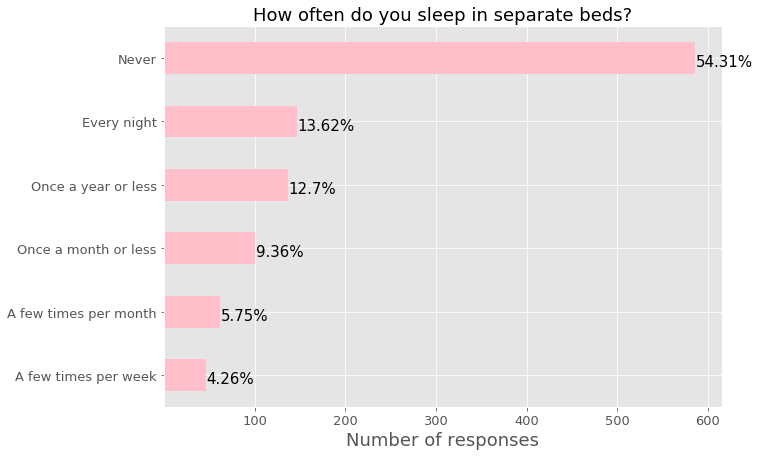

In [7]:
#plotting "How often do you sleep in separate beds?" with percentages:
plt.style.use('ggplot')

ax = sleepdf['separ_beds_freq'].value_counts().drop("N/A").plot(kind='barh', figsize=(10,7), color='pink', fontsize=13)

ax.set_title("How often do you sleep in separate beds?", fontsize=18)
ax.set_xlabel("Number of responses", fontsize=18)
ax.set_xticks([100, 200, 300, 400, 500, 600])

totals=[]
for i in ax.patches:
    totals.append(i.get_width())

total=sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='black')
ax.invert_yaxis()

In [8]:
sleepdf.duration.value_counts()

More than 20 years    468
6-10 years            165
1-5 years             162
11-15 years           159
16-20 years           104
Less than 1 year       21
N/A                    14
Name: duration, dtype: int64

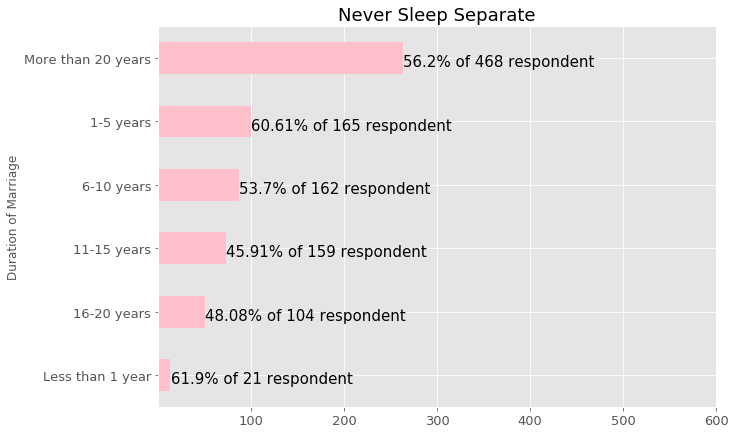

In [9]:
#what percentage of married couple said never sleep separate based on the duration of marriage?

sleepdf.set_index('separ_beds_freq', inplace =True)


sleep_separ_never = sleepdf.loc[["Never"],['duration']]
sleep_separ_never.duration.value_counts()
ax2 = sleep_separ_never['duration'].value_counts().plot(kind='barh', figsize=(10,7), color='pink', fontsize=13)

ax2.set_title("Never Sleep Separate", fontsize=18)
ax2.set_ylabel('Duration of Marriage', fontsize=12)
ax2.set_xticks([100, 200, 300, 400, 500, 600])

totals2_width=[]
for i in ax2.patches:
    totals2_width.append(i.get_width())

totals2_y=[]
for i in ax2.patches:
    totals2_y.append(i.get_y())

totals2_total=[468, 165, 162, 159, 104, 21] #total number of respondents based on duration of marriage. get by sleepdf.duration.value_counts



for i in range(0,6):
    ax2.text(totals2_width[i]+.3, totals2_y[i]+.38, str(round((totals2_width[i]/totals2_total[i])*100, 2))+'%'+ " " + 'of' + " " +  str(totals2_total[i]) + " " + 'respondent', fontsize=15, color='black')
ax2.invert_yaxis() 

#totals2_width[i]+.3, totals2_y[i]+.38: the numbers after + is just for positioning of the text for bars

In [10]:
totals2_width

[263, 100, 87, 73, 50, 13]

In [11]:
#sleepdf.set_index('separ_beds_freq', inplace =True)
sleep_separ_never = sleepdf.loc[["Never"],['income']]
sleepdf.income.value_counts().drop("N/A")


$50,000 - $99,999      314
$100,000 - $149,999    226
$150,000+              126
$25,000 - $49,999       99
$0 - $24,999            45
Name: income, dtype: int64

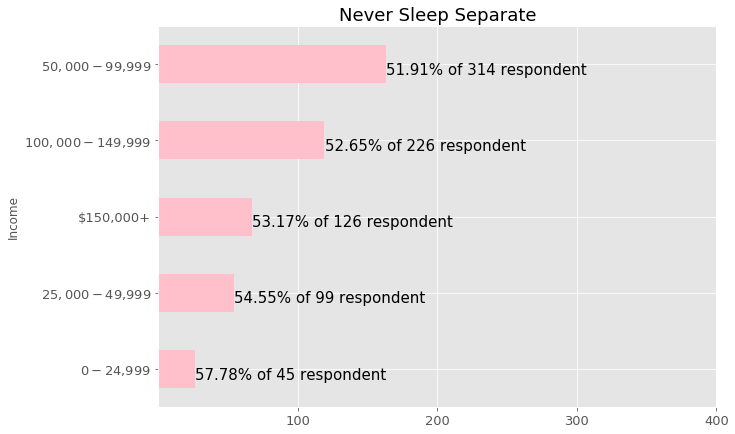

In [12]:
#run this each time kernel restarts!!
#sleepdf.set_index('separ_beds_freq', inplace =True)



sleep_separ_never = sleepdf.loc[["Never"],['income']]
sleep_separ_never.income.value_counts().drop("N/A")
ax4 = sleep_separ_never['income'].value_counts().drop("N/A").plot(kind='barh', figsize=(10,7), color='pink', fontsize=13)

ax4.set_title("Never Sleep Separate", fontsize=18)
ax4.set_ylabel('Income', fontsize=12)
ax4.set_xticks([100, 200, 300, 400])

totals4_width=[]
for i in ax4.patches:
    totals4_width.append(i.get_width())

totals4_y=[]
for i in ax4.patches:
    totals4_y.append(i.get_y())

totals4_total=[314, 226, 126, 99, 45] #total number of respondents based on income. get by sleepdf.income.value_counts().drop("N/A")



for i in range(0,5):
    ax4.text(totals4_width[i]+.3, totals4_y[i]+.38, str(round((totals4_width[i]/totals4_total[i])*100, 2))+'%'+ " " + 'of' + " " +  str(totals4_total[i]) + " " + 'respondent', fontsize=15, color='black')
ax4.invert_yaxis() 
#totals2_width[i]+.3, totals2_y[i]+.38: the numbers after + is just for positioning of the text for bars

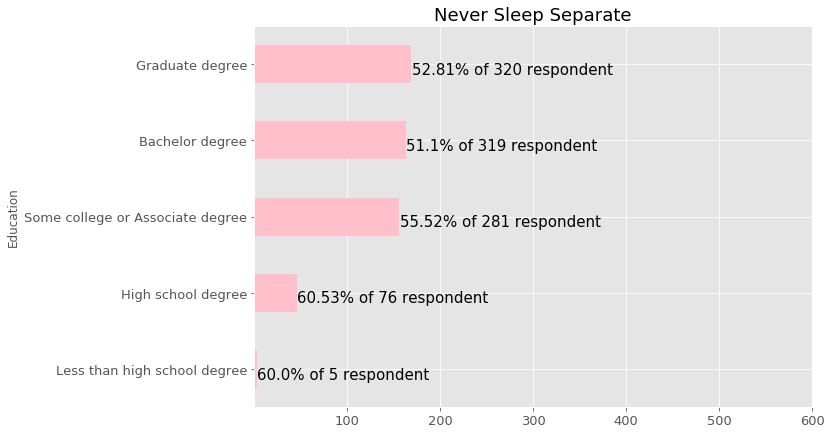

In [13]:
#run this each time kernel restarts!!
#sleepdf.set_index('separ_beds_freq', inplace =True)



sleep_separ_never = sleepdf.loc[["Never"],['education']]
sleep_separ_never.education.value_counts().drop("N/A")
ax5 = sleep_separ_never['education'].value_counts().drop("N/A").plot(kind='barh', figsize=(10,7), color='pink', fontsize=13)

ax5.set_title("Never Sleep Separate", fontsize=18)
ax5.set_ylabel('Education', fontsize=12)
ax5.set_xticks([100, 200, 300, 400, 500, 600])

totals5_width=[]
for i in ax5.patches:
    totals5_width.append(i.get_width())

totals5_y=[]
for i in ax5.patches:
    totals5_y.append(i.get_y())

totals5_total=[320, 319, 281, 76, 5] #total number of respondents based on income. get by sleepdf.income.value_counts().drop("N/A")



for i in range(0,5):
    ax5.text(totals5_width[i]+.3, totals5_y[i]+.38, str(round((totals5_width[i]/totals5_total[i])*100, 2))+'%'+ " " + 'of' + " " +  str(totals5_total[i]) + " " + 'respondent', fontsize=15, color='black')
ax5.invert_yaxis() 
#totals2_width[i]+.3, totals2_y[i]+.38: the numbers after + is just for positioning of the text for bars

In [14]:
sleepdf.region.value_counts().drop("N/A")


East North Central    197
Middle Atlantic       157
South Atlantic        147
Pacific               136
West North Central    101
New England            95
Mountain               69
West South Central     66
East South Central     33
Name: region, dtype: int64

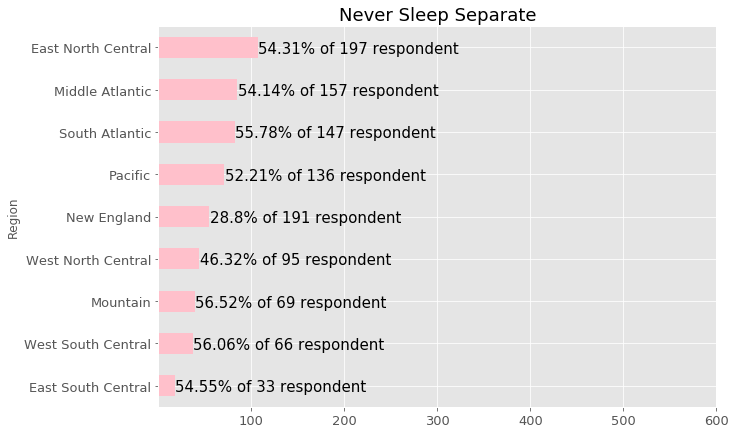

In [15]:
#run this each time kernel restarts!!
#sleepdf.set_index('separ_beds_freq', inplace =True)



sleep_separ_never = sleepdf.loc[["Never"],['region']]
sleep_separ_never.region.value_counts().drop("N/A")
ax6 = sleep_separ_never['region'].value_counts().drop("N/A").plot(kind='barh', figsize=(10,7), color='pink', fontsize=13)

ax6.set_title("Never Sleep Separate", fontsize=18)
ax6.set_ylabel('Region', fontsize=12)
ax6.set_xticks([100, 200, 300, 400, 500, 600])

totals6_width=[]
for i in ax6.patches:
    totals6_width.append(i.get_width())

totals6_y=[]
for i in ax6.patches:
    totals6_y.append(i.get_y())

totals6_total=[197, 157, 147, 136, 191, 95, 69, 66, 33] #total number of respondents based on income. get by sleepdf.income.value_counts().drop("N/A")



for i in range(0,9):
    ax6.text(totals6_width[i]+.3, totals6_y[i]+.38, str(round((totals6_width[i]/totals6_total[i])*100, 2))+'%'+ " " + 'of' + " " +  str(totals6_total[i]) + " " + 'respondent', fontsize=15, color='black')
ax6.invert_yaxis() 
#totals2_width[i]+.3, totals2_y[i]+.38: the numbers after + is just for positioning of the text for bars

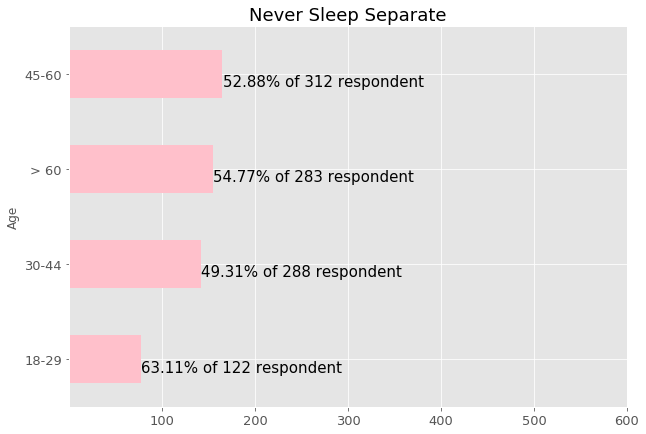

In [16]:
sleep_separ_never = sleepdf.loc[["Never"],['age']]
#sleep_separ_never.region.value_counts().drop("N/A")
ax7 = sleep_separ_never['age'].value_counts().drop("N/A").plot(kind='barh', figsize=(10,7), color='pink', fontsize=13)

ax7.set_title("Never Sleep Separate", fontsize=18)
ax7.set_ylabel('Age', fontsize=12)
ax7.set_xticks([100, 200, 300, 400, 500, 600])

totals7_width=[]
for i in ax7.patches:
    totals7_width.append(i.get_width())

totals7_y=[]
for i in ax7.patches:
    totals7_y.append(i.get_y())

totals7_total=[312, 283, 288, 122] #total number of people in age groups of respondents 



for i in range(0,4):
    ax7.text(totals7_width[i]+.3, totals7_y[i]+.38, str(round((totals7_width[i]/totals7_total[i])*100, 2))+'%'+ " " + 'of' + " " +  str(totals7_total[i]) + " " + 'respondent', fontsize=15, color='black')
ax7.invert_yaxis() 

In [17]:

sleepdf.age.value_counts().drop("N/A")





45-60    312
30-44    288
> 60     283
18-29    122
Name: age, dtype: int64

In [18]:
#we changed the index before so now we need to turn the dataset to its original form

sleepdf = pd.read_csv('sleepdata.csv')
sleepdf = sleepdf.drop(labels=['StartDate', 'EndDate'], axis=1)
sleepdf.columns = ['Rls_status', 'duration', 'separ_beds_freq', 'sleep_locat', 'other_sleep_locat', 'partner_sleep_locat', 'other_partner_sleep_locat', 'reason_snore', 'reason_bathroom', 'reason_sickness', 'reason_no_intimacy', 'reason_temp', 'reason_argument', 'reason_no_space', 'reason_share_covers', 'reason_sleep_with_child', 'reason_night_working', 'reason_other', 'first_time_separ' ,'separ_is_good?', 'separ_means_sleep_better?', 'separ_made_sex_better?', 'job', 'other_job', 'gender', 'age', 'income', 'education', 'region']
sleepdf = sleepdf.drop([0])
sleepdf = sleepdf.dropna(how='all')
sleepdf = sleepdf.fillna("N/A")
sleepdf.head(2)

,Rls_status,duration,separ_beds_freq,sleep_locat,other_sleep_locat,partner_sleep_locat,other_partner_sleep_locat,reason_snore,reason_bathroom,reason_sickness,...,separ_is_good?,separ_means_sleep_better?,separ_made_sex_better?,job,other_job,gender,age,income,education,region
1,"Single, but cohabiting with a significant other",1-5 years,Once a year or less,On the couch/chair,N/A,"My partner sleeps in our shared bed, I'm the o...",N/A,N/A,N/A,One of us is sick,...,Strongly disagree,Somewhat agree,Strongly disagree,Other (please specify),Student,Male,18-29,"$0 - $24,999",Some college or Associate degree,Pacific
2,"Single, but cohabiting with a significant other",1-5 years,A few times per month,"I sleep in our shared bed, my partner is the o...",N/A,Separate bedroom,N/A,One of us snores,One of us makes frequent bathroom trips in the...,One of us is sick,...,Somewhat agree,Strongly agree,Strongly disagree,Healthcare Support Occupations,N/A,Male,18-29,N/A,Bachelor degree,South Atlantic


In [19]:
snore = sleepdf.reason_snore.value_counts().drop('N/A')
bathroom_trips = sleepdf.reason_bathroom.value_counts().drop('N/A')
sickness = sleepdf.reason_sickness.value_counts().drop('N/A')
no_intimacy = sleepdf.reason_no_intimacy.value_counts().drop('N/A')
temperature = sleepdf.reason_temp.value_counts().drop('N/A')
argument = sleepdf.reason_argument.value_counts().drop('N/A')
no_space = sleepdf.reason_no_space.value_counts().drop('N/A')
share_covers =sleepdf.reason_share_covers.value_counts().drop('N/A')
sleep_with_child = sleepdf.reason_sleep_with_child.value_counts().drop('N/A')
night_work = sleepdf.reason_night_working.value_counts().drop('N/A')
other=sleepdf.reason_other.value_counts().drop('N/A')



reasons2 = pd.DataFrame({'snore': snore, 'bathroom_trips': bathroom_trips, 'sickness': sickness, 'no_intimacy': no_intimacy,'temperature':temperature, 'argument':argument, 'no_space':no_space, 'share_covers': share_covers, 'sleep_with_child': sleep_with_child, 'night_work':night_work, 'other':other})
reasons2

,argument,bathroom_trips,night_work,no_intimacy,no_space,other,share_covers,sickness,sleep_with_child,snore,temperature
Do not want to share the covers,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN
Night working/very different sleeping times,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Not enough space,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN
One of us is sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0,NaN,NaN,NaN
One of us makes frequent bathroom trips in the night,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
One of us needs to sleep with a child,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,NaN,NaN
One of us snores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220.0,NaN
Other (please specify),NaN,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN,NaN
We are no longer physically intimate,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
We have different temperature preferences for the room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0


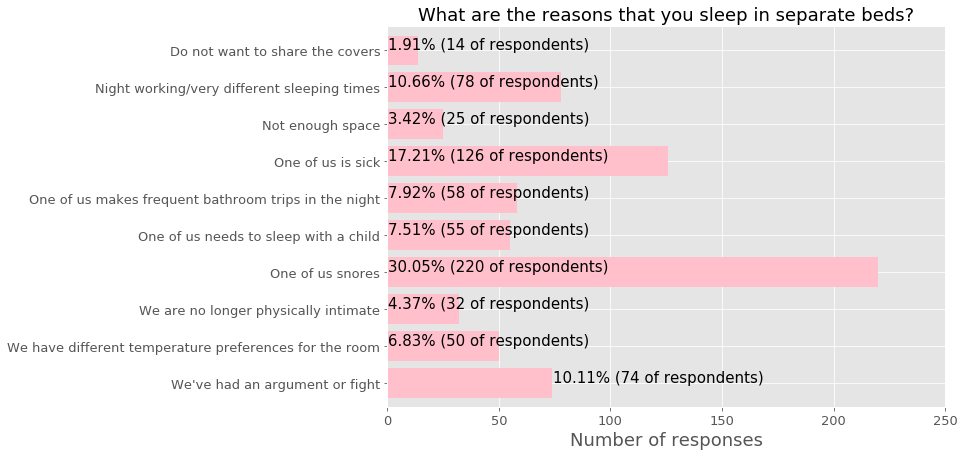

In [20]:

plt.style.use('ggplot')
reaons2 = reasons2.drop('other', axis=1)
reasons2 = reasons2.drop('Other (please specify)')
ax3 = reasons2.plot(kind='barh',stacked=True, width=0.8, figsize=(10,7), fontsize=13, color='pink')

ax3.set_title("What are the reasons that you sleep in separate beds?", fontsize=18)
ax3.set_xlabel("Number of responses", fontsize=18)
ax3.set_xticks([0, 50, 100, 150, 200, 250])

totals3_width=[]
for i in ax3.patches:
    totals3_width.append(i.get_width())

totals3_y=[]
for i in ax3.patches:
    totals3_y.append(i.get_y())


totals3 = [14, 78, 25, 126, 58, 55, 220, 32, 50, 74]

for i in range(0,10):
    ax3.text(totals3_width[i]+.3, totals3_y[i]+.38, str(round((totals3[i]/sum(totals3))*100, 2))+'%'+ " " + "(" + str(totals3[i]) + " " + "of respondents" + ")", fontsize=15, color='black')
ax3.invert_yaxis()


ax3.get_legend().set_visible(False)